In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [216]:
data = pd.read_csv('train.csv')

In [217]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [218]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [185]:
data['Age'] = data.groupby(['Sex','Parch'])['Age'].transform(lambda x : x.fillna(x.mean()))

In [186]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
data.isna().sum()/data.shape[1]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          57.250000
Embarked        0.166667
dtype: float64

In [188]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.02381,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [189]:
data['Cabin'] = data.groupby(['Pclass'])['Cabin'].transform(lambda x : x.fillna(x.mode()[0]))

In [190]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [191]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [192]:
data['Cabin'].value_counts()
data['Cabin'].unique()

array(['G6', 'C85', 'C123', 'E46', 'D', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B96 B98', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83',
       'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7',
       'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78',
       'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7',
       'A19', 'B49', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [193]:
data['Cabin_board'] = data['Cabin'].str[0]

In [194]:
data['Embarked'] = data.groupby(['Pclass'])['Embarked'].transform(lambda x : x.fillna(x.mode()[0]))

In [195]:
data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [196]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_board
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,G6,S,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,G6,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,G6,S,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,D,S,D
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.02381,1,2,W./C. 6607,23.4500,G6,S,G
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C,C


In [197]:
help(data['Name'].str.split)

Help on method split in module pandas.core.strings.accessor:

split(pat: 'str | re.Pattern | None' = None, n=-1, expand=False, *, regex: 'bool | None' = None) method of pandas.core.strings.accessor.StringMethods instance
    Split strings around given separator/delimiter.
    
    Splits the string in the Series/Index from the beginning,
    at the specified delimiter string.
    
    Parameters
    ----------
    pat : str or compiled regex, optional
        String or regular expression to split on.
        If not specified, split on whitespace.
    n : int, default -1 (all)
        Limit number of splits in output.
        ``None``, 0 and -1 will be interpreted as return all splits.
    expand : bool, default False
        Expand the split strings into separate columns.
    
        - If ``True``, return DataFrame/MultiIndex expanding dimensionality.
        - If ``False``, return Series/Index, containing lists of strings.
    
    regex : bool, default None
        Determines if the

In [198]:
data.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_board
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S,G
5,6,0,3,"Moran, Mr. James",male,32.764946,0,0,330877,8.4583,G6,Q,G
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,G6,S,G
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,G6,S,G
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,D,C,D


In [199]:
data['Name'].apply(lambda x : x.split(',')[1].split('.')[0]).head(20)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
Name: Name, dtype: object

In [200]:
data['Title'] = data['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

In [201]:
data['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

In [202]:
data['Age'] = data['Age'].astype('int')

In [203]:
data_ = data.drop(columns=['PassengerId','Name', 'Ticket','Cabin'])

In [204]:
data_categorical_encode = pd.get_dummies(data[['Sex','Embarked','Cabin_board','Title']])

In [205]:
data_numerical = data.select_dtypes(include = np.number).drop(columns=['PassengerId','Survived'])

In [206]:
data_categorical_encode = data_categorical_encode.reset_index().drop(columns = 'index')
data_numerical = data_numerical.reset_index().drop(columns = 'index')


In [207]:
X = pd.concat([data_categorical_encode,data_numerical], axis = 1)

In [208]:
X

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_board_A,Cabin_board_B,Cabin_board_C,Cabin_board_D,Cabin_board_E,...,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,22,1,0,7.2500
1,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,38,1,0,71.2833
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,26,0,0,7.9250
3,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,35,1,0,53.1000
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,35,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,2,27,0,0,13.0000
887,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,19,0,0,30.0000
888,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,18,1,2,23.4500
889,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,26,0,0,30.0000


In [209]:
y = data['Survived']

In [210]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=23)

In [211]:
model_ = [LogisticRegression(penalty='none'),
LogisticRegression(penalty='l1', solver = 'liblinear'),
LogisticRegression(penalty='l2'),
LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio = 0.5),
KNeighborsClassifier(),
GaussianNB(),
DecisionTreeClassifier()]


In [212]:
res = []
for model in model_:
    model.fit(train_X,train_y)
    train_accuracy = accuracy_score(train_y, model.predict(train_X))
    test_accuracy = accuracy_score(test_y, model.predict(test_X))
    res.append([model, train_accuracy, test_accuracy])
    
    

In [213]:
pd.DataFrame(res, columns = ['Model','Train Accuracy', 'Test Accuracy'])

,Model,Train Accuracy,Test Accuracy
0,LogisticRegression(penalty='none'),0.844311,0.802691
1,"LogisticRegression(penalty='l1', solver='libli...",0.836826,0.825112
2,LogisticRegression(),0.838323,0.811659
3,"LogisticRegression(l1_ratio=0.5, penalty='elas...",0.678144,0.726457
4,KNeighborsClassifier(),0.814371,0.721973
5,GaussianNB(),0.714072,0.721973
6,DecisionTreeClassifier(),0.988024,0.789238


In [219]:
degree_ = [1,2,3]
res = []
for degree in tqdm(degree_):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    train_X, test_X, train_y, test_y = train_test_split(X_poly, y, test_size=0.25, random_state=23)
    
    model_ = [LogisticRegression(penalty='none'),
    LogisticRegression(penalty='l1', solver = 'liblinear'),
    LogisticRegression(penalty='l2'),
    LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio = 0.5),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()]


    
    for model in model_:
        model.fit(train_X,train_y)
        train_accuracy = accuracy_score(train_y, model.predict(train_X))
        test_accuracy = accuracy_score(test_y, model.predict(test_X))
        res.append([model, degree, train_accuracy, test_accuracy])
    
    

100%|████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:24<00:00,  8.13s/it]


In [221]:
pd.DataFrame(res, columns = ['Model','Polynomial Dregree','Train Accuracy', 'Test Accuracy'])

,Model,Polynomial Dregree,Train Accuracy,Test Accuracy
0,LogisticRegression(penalty='none'),1,0.839820,0.802691
1,"LogisticRegression(penalty='l1', solver='libli...",1,0.836826,0.825112
2,LogisticRegression(),1,0.844311,0.811659
3,"LogisticRegression(l1_ratio=0.5, penalty='elas...",1,0.678144,0.726457
4,KNeighborsClassifier(),1,0.814371,0.721973
5,GaussianNB(),1,0.714072,0.721973
6,DecisionTreeClassifier(),1,0.988024,0.802691
7,LogisticRegression(penalty='none'),2,0.823353,0.771300
8,"LogisticRegression(penalty='l1', solver='libli...",2,0.856287,0.820628
9,LogisticRegression(),2,0.827844,0.789238


In [222]:
model = DecisionTreeClassifier()

In [227]:
X

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_board_A,Cabin_board_B,Cabin_board_C,Cabin_board_D,Cabin_board_E,...,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,22,1,0,7.2500
1,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,38,1,0,71.2833
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,26,0,0,7.9250
3,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,35,1,0,53.1000
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,35,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,2,27,0,0,13.0000
887,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,19,0,0,30.0000
888,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,18,1,2,23.4500
889,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,26,0,0,30.0000


In [233]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [254]:
model.fit(data_[['Pclass', 'Age']], y)

DecisionTreeClassifier()

In [255]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

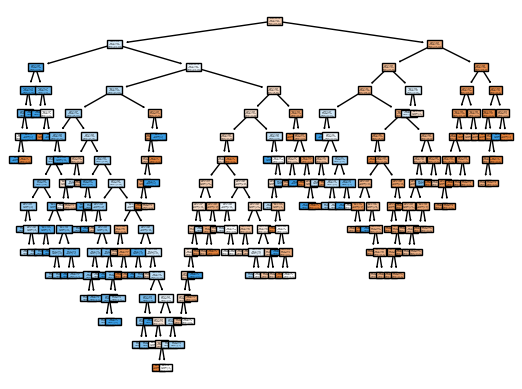

In [257]:
from sklearn import tree
import matplotlib as plt
tree.plot_tree(model)

_ = tree.plot_tree(model,feature_names=['Pclass','Age'],class_names = ['Survived', 'Not Survived'],
                   filled=True)


In [241]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 

                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [239]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 651.0 kB/s eta 0:00:00 0:00:01
